In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data=pd.read_csv('AppleStore.csv')

In [75]:
data.head(2)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


### 1/ Data Cleaning:
<p>Clear

## Analysis:

### 2/ Exploring App Genre:


In [77]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [78]:
num_prime_genre=data['prime_genre'].value_counts()

In [79]:
pie=[go.Pie(labels=num_prime_genre.index, values=num_prime_genre.values,
          title="Apple store app genre") ] 
plotly.offline.iplot(pie)

### 3/ Price and User Rating:

In [80]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


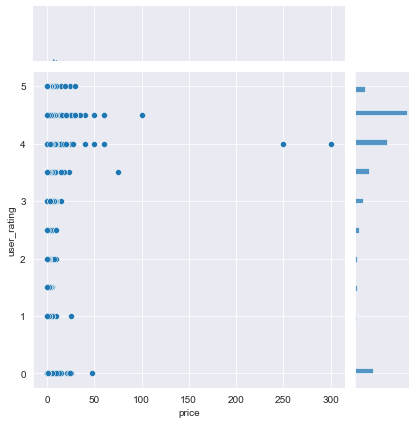

In [81]:
sns.set_style("darkgrid")

# Create jointplot for Price and User Rating:
plt1 = sns.jointplot(x = data['price'], y = data['user_rating']);
plt1;


### 4/ Feature associate with top 5 App Genre:

##### 4.1/ Price

In [87]:
large_categories=data.groupby(data['prime_genre']).filter(lambda x: len(x)>=248).reset_index()
small_categories=data.groupby(data['prime_genre']).filter(lambda x: len(x)<248).reset_index()

AttributeError: 'list' object has no attribute 'groupby'

In [88]:
large_categories['user_rating']

0       4.0
1       4.0
2       4.5
3       4.0
4       4.5
       ... 
5442    4.5
5443    4.5
5444    4.5
5445    4.5
5446    5.0
Name: user_rating, Length: 5447, dtype: float64

In [90]:
trace0 = go.Box(
    # Data for Game
    y=np.sqrt(large_categories['price'][large_categories['prime_genre']=='Games']),
    name = 'Game'
)

trace1 = go.Box(
    # Data for Utilities
    y=np.sqrt(large_categories['price'][large_categories['prime_genre']=='Utilities']),
    name = 'Utilities'
)

trace2 = go.Box(
    # Data for Entertainment
    y=np.sqrt(large_categories['price'][large_categories['prime_genre']=='Entertainment']),
    name = 'Entertainment'
)

trace3 = go.Box(
    # Data for Photo & Video
    y=np.sqrt(large_categories['price'][large_categories['prime_genre']=='Photo & Video']),
    name = 'Photo & Video'
)

trace4 = go.Box(
    # Data for Education
    y=np.sqrt(large_categories['price'][large_categories['prime_genre']=='Education']),
    name = 'Education'
)


data = [trace0, trace1,trace2,trace3,trace4]
plotly.offline.iplot({'data': data})


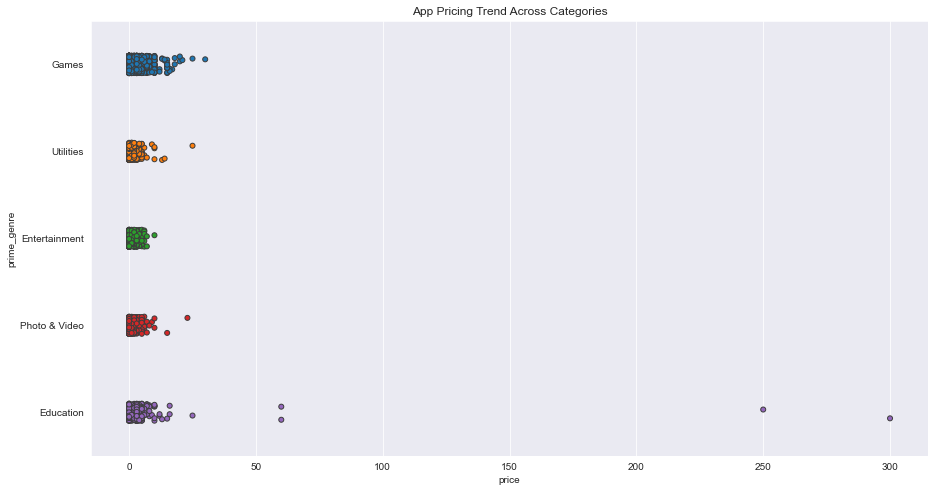

In [91]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax=sns.stripplot( x=large_categories['price'], y=large_categories['prime_genre'],jitter=True, linewidth=1);
ax.set_title('App Pricing Trend Across Categories');

##### 4.2/ Rating:

In [92]:
trace0 = go.Box(
    # Data for Game
    y=large_categories['user_rating'][large_categories['prime_genre']=='Games'],
    name = 'Game'
)

trace1 = go.Box(
    # Data for Utilities
    y=large_categories['user_rating'][large_categories['prime_genre']=='Utilities'],
    name = 'Utilities'
)

trace2 = go.Box(
    # Data for Entertainment
    y=large_categories['user_rating'][large_categories['prime_genre']=='Entertainment'],
    name = 'Entertainment'
)

trace3 = go.Box(
    # Data for Photo & Video
    y=large_categories['user_rating'][large_categories['prime_genre']=='Photo & Video'],
    name = 'Photo & Video'
)

trace4 = go.Box(
    # Data for Education
    y=large_categories['user_rating'][large_categories['prime_genre']=='Education'],
    name = 'Education'
)
data = [trace0, trace1,trace2,trace3,trace4]
plotly.offline.iplot({'data': data})

In [93]:
pd.pivot_table(large_categories,values='user_rating', index='prime_genre')

,user_rating
prime_genre,
Education,3.376380
Entertainment,3.246729
Games,3.685008
Photo & Video,3.800860
Utilities,3.278226


### 5/ Compare top 5 apps with remain apps:

In [94]:
large_categories=data.groupby(data['prime_genre']).filter(lambda x: len(x)>=248).reset_index()
small_categories=data.groupby(data['prime_genre']).filter(lambda x: len(x)<248).reset_index()

AttributeError: 'list' object has no attribute 'groupby'

In [95]:
trace0 = go.Violin(
     y=large_categories['user_rating'],
    name='Top 5 Categories'
)
trace1 = go.Violin(
     y=small_categories['user_rating'],
    name="Remain Categories"
)
data=[trace0,trace1]
plotly.offline.iplot(data)

In [96]:
trace0 = go.Violin(
     y=np.sqrt(large_categories['price']),
    name='Top 5 Categories'
)
trace1 = go.Violin(
     y=np.sqrt(small_categories['price']),
    name="Remain Categories"
)
data=[trace0,trace1]
plotly.offline.iplot(data)